### Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import nltk
import re

In [2]:
# Load the data set

df=pd.read_csv('spam.csv',encoding='latin-1')
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [3]:
df.drop(['Unnamed: 2','Unnamed: 3','Unnamed: 4'],axis=1,inplace=True) #drop the columns
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [4]:
df.columns =['Class','Message']   # change the column names
df.head()

,Class,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [5]:
df['len']=[len(text) for text in df.Message]
df.head()

,Class,Message,len
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


In [6]:
df.describe()

,len
count,5572.000000
mean,80.118808
std,59.690841
min,2.000000
25%,36.000000
50%,61.000000
75%,121.000000
max,910.000000


In [7]:
df.groupby('Class').describe()

len                                                         
        count        mean        std   min    25%    50%    75%    max
Class                                                                 
ham    4825.0   71.023627  58.016023   2.0   33.0   52.0   92.0  910.0
spam    747.0  138.866131  29.183082  13.0  132.5  149.0  157.0  224.0

In [8]:
df['Class'].value_counts()/df['Class'].shape

ham     0.865937
spam    0.134063
Name: Class, dtype: float64

In [9]:
df['Class'].shape

(5572,)

### Word Cloud

In [10]:
stopwords_list=nltk.corpus.stopwords.words('english') # stopwords list for english
tokener= nltk.word_tokenize #to tokenize

In [11]:
from collections import Counter

common_words={'word':[],'count':[]}

for word in df['Message']:
    tok = tokener(word)
    #print(tok)
    m_counter = Counter(tok)
    #print(m_counter)
    #print(m_counter.most_common(1))
    common_words['word'].append(m_counter.most_common(1)[0][0])
    common_words['count'].append(m_counter.most_common(1)[0][1])
    #print("=============")
common_words_df = pd.concat([df,pd.DataFrame(common_words)],axis=1)
common_words_df


,Class,Message,len,word,count
0,ham,"Go until jurong point, crazy.. Available only ...",111,...,2
1,ham,Ok lar... Joking wif u oni...,29,...,2
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,to,3
3,ham,U dun say so early hor... U c already then say...,49,U,2
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,he,2
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,161,.,3
5568,ham,Will Ì_ b going to esplanade fr home?,37,Will,1
5569,ham,"Pity, * was in mood for that. So...any other s...",57,Pity,1
5570,ham,The guy did some bitching but I acted like i'd...,125,The,1


In [12]:
#pip install wordcloud

import wordcloud
words_cloud=wordcloud.WordCloud().generate_from_text(' '.join(common_words_df['word']))

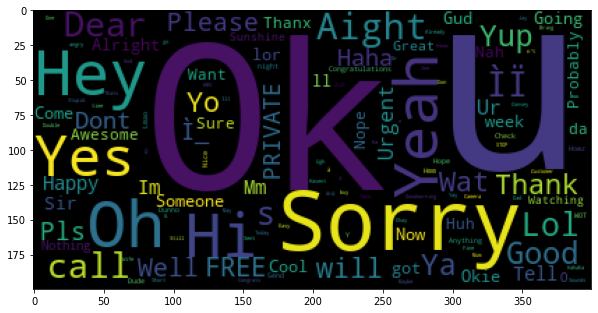

In [13]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
plt.imshow(words_cloud)

In [14]:
df.head()

,Class,Message,len
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


In [15]:
df.drop(['len'],axis=1,inplace=True)

In [16]:
df.head()

,Class,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [17]:
#oneline method to lower case
# df.Message=df.Message.apply(str.lower)
# df.Message

In [18]:
def remove_punch(text):
    clean_words=re.sub(r'[^a-zA-Z0-9]',' ',text.lower())
    return clean_words

df.Message=df.Message.apply(remove_punch) 
df.Message   

0       go until jurong point  crazy   available only ...
1                           ok lar    joking wif u oni   
2       free entry in 2 a wkly comp to win fa cup fina...
3       u dun say so early hor    u c already then say   
4       nah i don t think he goes to usf  he lives aro...
                              ...                        
5567    this is the 2nd time we have tried 2 contact u...
5568                will    b going to esplanade fr home 
5569    pity    was in mood for that  so   any other s...
5570    the guy did some bitching but i acted like i d...
5571                           rofl  its true to its name
Name: Message, Length: 5572, dtype: object

In [19]:
def remove_whitespace(text):
    cleaned_space=re.sub(' +',' ',text)
    return cleaned_space
df.Message = df.Message.apply(remove_whitespace) 
df.Message   

0       go until jurong point crazy available only in ...
1                                ok lar joking wif u oni 
2       free entry in 2 a wkly comp to win fa cup fina...
3            u dun say so early hor u c already then say 
4       nah i don t think he goes to usf he lives arou...
                              ...                        
5567    this is the 2nd time we have tried 2 contact u...
5568                   will b going to esplanade fr home 
5569    pity was in mood for that so any other suggest...
5570    the guy did some bitching but i acted like i d...
5571                            rofl its true to its name
Name: Message, Length: 5572, dtype: object

In [20]:
def remove_stopwords(text):
    tok_word=tokener(text)

    clean_words=[]

    for word in tok_word:
        if word in stopwords_list:
            continue
        else:
            clean_words.append(word)

    words=' '.join(clean_words)
    return words

df.Message = df.Message.apply(remove_stopwords) 
df.Message  

0       go jurong point crazy available bugis n great ...
1                                 ok lar joking wif u oni
2       free entry 2 wkly comp win fa cup final tkts 2...
3                     u dun say early hor u c already say
4                  nah think goes usf lives around though
                              ...                        
5567    2nd time tried 2 contact u u 750 pound prize 2...
5568                            b going esplanade fr home
5569                                pity mood suggestions
5570    guy bitching acted like interested buying some...
5571                                       rofl true name
Name: Message, Length: 5572, dtype: object

In [21]:
ham_class=df[df['Class']=='ham']
spam_class=df[df['Class']=='spam']

In [22]:
ham_class.Message

0       go jurong point crazy available bugis n great ...
1                                 ok lar joking wif u oni
3                     u dun say early hor u c already say
4                  nah think goes usf lives around though
6          even brother like speak treat like aids patent
                              ...                        
5565                                              huh lei
5568                            b going esplanade fr home
5569                                pity mood suggestions
5570    guy bitching acted like interested buying some...
5571                                       rofl true name
Name: Message, Length: 4825, dtype: object

In [23]:
ham_text=' '.join(ham_class.Message)
spam_text=' '.join(spam_class.Message)

In [24]:
ham_words_cloud=wordcloud.WordCloud().generate_from_text(ham_text)
spam_words_cloud=wordcloud.WordCloud().generate_from_text(spam_text)

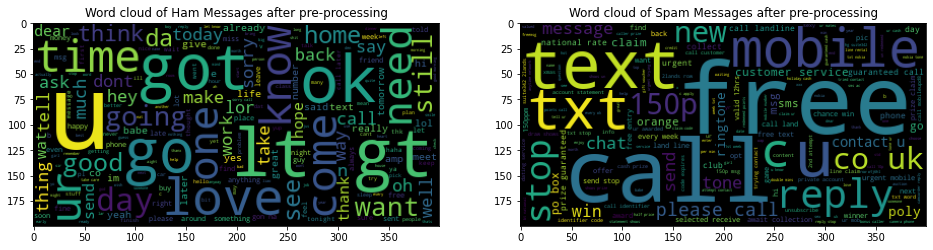

In [25]:
plt.figure(figsize=(16,12))
plt.subplot(121)
plt.title('Word cloud of Ham Messages after pre-processing')
plt.imshow(ham_words_cloud)
plt.subplot(122)
plt.title('Word cloud of Spam Messages after pre-processing')
plt.imshow(spam_words_cloud)

In [26]:
def remove_digits(text):
    clean_words=re.sub(r'[^a-zA-Z]',' ',text.lower())
    return clean_words

df.Message=df.Message.apply(remove_digits) 
df.Message   

0       go jurong point crazy available bugis n great ...
1                                 ok lar joking wif u oni
2       free entry   wkly comp win fa cup final tkts  ...
3                     u dun say early hor u c already say
4                  nah think goes usf lives around though
                              ...                        
5567     nd time tried   contact u u     pound prize  ...
5568                            b going esplanade fr home
5569                                pity mood suggestions
5570    guy bitching acted like interested buying some...
5571                                       rofl true name
Name: Message, Length: 5572, dtype: object

In [27]:
df.Message = df.Message.apply(remove_whitespace) 
df.Message   

0       go jurong point crazy available bugis n great ...
1                                 ok lar joking wif u oni
2       free entry wkly comp win fa cup final tkts st ...
3                     u dun say early hor u c already say
4                  nah think goes usf lives around though
                              ...                        
5567     nd time tried contact u u pound prize claim e...
5568                            b going esplanade fr home
5569                                pity mood suggestions
5570    guy bitching acted like interested buying some...
5571                                       rofl true name
Name: Message, Length: 5572, dtype: object

In [28]:
lm=nltk.WordNetLemmatizer()

In [29]:
def lemma(text):
    tok_word = tokener(text)
    lemma_word =[]
    # print("token :",tok_word)
    for tok in tok_word:
        lemma_tok = lm.lemmatize(tok)
        lemma_word.append(lemma_tok)
    # print("lemmatization :",lemma_word)
    final_text= " ".join(lemma_word)
    # print("Final text :",final_text)
    return final_text


In [30]:
df.Message=df.Message.apply(lemma)

### Bag of Words

In [31]:
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer(stop_words='english',max_features=2500,ngram_range=(1,2))
scaled_x=cv.fit_transform(df.Message)

In [32]:
df_bow_sklearn=pd.DataFrame(scaled_x.toarray(),columns=cv.get_feature_names_out())
df_bow_sklearn.head()


,aathi,abiola,able,abt,ac,acc,accept,access,accidentally,account,...,ym,yo,yo yo,yoga,yogasana,yr,yun,yup,yup thk,zed
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [33]:
df['Class'] = df['Class'].map({'spam':1,'ham':0})

In [34]:
df['Class'] 

0       0
1       0
2       1
3       0
4       0
       ..
5567    1
5568    0
5569    0
5570    0
5571    0
Name: Class, Length: 5572, dtype: int64

In [35]:
# train test split

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(df_bow_sklearn,df['Class'],test_size=0.3,random_state=42) 

In [36]:
y_train

708     1
4338    0
5029    0
4921    0
2592    0
       ..
3772    0
5191    0
5226    0
5390    0
860     0
Name: Class, Length: 3900, dtype: int64

In [37]:
from sklearn.ensemble import RandomForestClassifier
clf=RandomForestClassifier()
clf.fit(X_train,y_train)

RandomForestClassifier()

In [38]:
y_pred=clf.predict(X_test)

In [39]:
#metrics

from sklearn import metrics

metrics.accuracy_score(y_test,y_pred)

0.9706937799043063

In [40]:
clf.score(X_train,y_train)

0.9994871794871795

In [41]:
clf.score(X_test, y_test)

0.9706937799043063

### TF-IDF

In [42]:
from sklearn.feature_extraction.text import TfidfVectorizer
tf_idf=TfidfVectorizer(ngram_range=(1,3),max_features=2500)
scaled_X_tf=tf_idf.fit_transform(df.Message)


In [43]:
df_tfidf_sklearn = pd.DataFrame(scaled_X_tf.toarray(),columns=tf_idf.get_feature_names())
df_tfidf_sklearn.head()


c:\Users\Public\anaconda3\envs\NLP\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,aathi,abiola,able,abt,ac,acc,accept,access,account,account statement,...,yet,yijue,ym,yo,yoga,yogasana,yr,yun,yup,zed
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [44]:
# train Test split

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(df_tfidf_sklearn,df['Class'],test_size=0.3,random_state=42)


In [45]:
clf_tfidf = RandomForestClassifier()
clf_tfidf.fit(X_train, y_train)


RandomForestClassifier()

In [46]:
y_pred=clf_tfidf.predict(X_test)

In [47]:
#metrics

from sklearn import metrics

metrics.accuracy_score(y_test,y_pred)

0.9808612440191388

In [48]:
clf_tfidf.score(X_train,y_train)

0.9997435897435898

In [49]:
clf_tfidf.score(X_test, y_test)

0.9808612440191388

### Word2Vec

In [50]:
#! pip install gensim

In [51]:
df.head()

,Class,Message
0,0,go jurong point crazy available bugis n great ...
1,0,ok lar joking wif u oni
2,1,free entry wkly comp win fa cup final tkts st ...
3,0,u dun say early hor u c already say
4,0,nah think go usf life around though


In [52]:
from nltk import sent_tokenize
from gensim.utils import simple_preprocess
words=[]
for sent in df.Message:
    sent_token = sent_tokenize(sent)
    
    for sent in sent_token:
        words.append(simple_preprocess(sent))


In [53]:
words[:5]

[['go',
  'jurong',
  'point',
  'crazy',
  'available',
  'bugis',
  'great',
  'world',
  'la',
  'buffet',
  'cine',
  'got',
  'amore',
  'wat'],
 ['ok', 'lar', 'joking', 'wif', 'oni'],
 ['free',
  'entry',
  'wkly',
  'comp',
  'win',
  'fa',
  'cup',
  'final',
  'tkts',
  'st',
  'may',
  'text',
  'fa',
  'receive',
  'entry',
  'question',
  'std',
  'txt',
  'rate',
  'apply',
  'over'],
 ['dun', 'say', 'early', 'hor', 'already', 'say'],
 ['nah', 'think', 'go', 'usf', 'life', 'around', 'though']]

In [54]:
words=[]
classList=[]
for sent,classVal in zip(df['Message'],df['Class']):
    sent_token = sent_tokenize(sent)
    
    for sent in sent_token:
        words.append(simple_preprocess(sent))
        classList.append(classVal)


In [55]:
# from gensim.utils import simple_preprocess (simple way to do stopwards but now not needed as we have done all the process already)

import gensim
import gensim.downloader as api
#wv=api.load('word2vec-google-news-300')              (already downloaded)

In [56]:
model=gensim.models.Word2Vec(words,window=5,min_count=2)

In [57]:
model.corpus_count

5564

In [58]:
df.shape

(5572, 2)

In [59]:
model.epochs

5

In [60]:
model.wv.similar_by_word('point')

[('cash', 0.9993882775306702),
 ('went', 0.9993630647659302),
 ('tell', 0.9993621110916138),
 ('get', 0.9993513226509094),
 ('da', 0.9993463158607483),
 ('ur', 0.9993448853492737),
 ('go', 0.9993410110473633),
 ('friend', 0.999334454536438),
 ('amp', 0.9993309378623962),
 ('today', 0.9993140697479248)]

In [66]:
def avg_word2vec(doc):
    val=[model.wv[word] for word in doc if word in model.wv.index_to_key]
    if len(val) !=0:
        outResult = np.mean([model.wv[word] for word in doc if word in model.wv.index_to_key],axis=0)
    else:
        outResult=np.asarray([])
    return outResult


In [67]:
range(len(words))

range(0, 5564)

In [68]:
X=[]
for i in  range(len(words)):
    X.append(avg_word2vec(words[i]))


In [69]:
X = [arr.tolist() for arr in X]


In [70]:
Final_X=[]
labels_y=[]
for X_val,classVal in zip(X,classList):
    if len(X_val)!=0:
        Final_X.append(X_val)
        labels_y.append(classVal)


In [71]:
len(Final_X)

5541

In [72]:
len(labels_y)

5541

In [75]:
df=pd.DataFrame(Final_X)
df[100]=labels_y

In [76]:
df

,0,1,2,3,4,5,6,7,8,9,...,91,92,93,94,95,96,97,98,99,100
0,-0.189703,0.296253,0.006832,0.004814,0.022290,-0.383214,0.102839,0.522289,-0.172442,-0.159774,...,0.233853,-0.007869,0.122913,0.453693,0.269484,0.126248,-0.265144,0.101671,-0.004859,0
1,-0.124987,0.199693,0.000191,0.006585,0.015263,-0.262741,0.068736,0.363925,-0.118466,-0.107124,...,0.164485,-0.005714,0.082922,0.315032,0.187166,0.090339,-0.186898,0.071275,0.001652,0
2,-0.177466,0.274031,0.000845,0.007936,0.026052,-0.348098,0.093595,0.479176,-0.156428,-0.138390,...,0.214186,-0.009600,0.110092,0.413735,0.249941,0.108423,-0.235986,0.096011,-0.001013,1
3,-0.230870,0.363964,0.007160,0.008071,0.027088,-0.463880,0.126703,0.644583,-0.216402,-0.190134,...,0.285093,-0.004788,0.155058,0.561942,0.327653,0.158294,-0.323831,0.119706,-0.006208,0
4,-0.225700,0.352589,0.011985,0.000093,0.029205,-0.458076,0.123990,0.632647,-0.212459,-0.190753,...,0.279820,-0.005834,0.146807,0.546358,0.321617,0.151692,-0.320931,0.122091,-0.008435,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5536,-0.229127,0.363784,-0.002717,0.007226,0.036209,-0.463645,0.126937,0.641422,-0.208402,-0.183849,...,0.287896,-0.013220,0.143469,0.559180,0.333660,0.144225,-0.320712,0.125803,0.001115,1
5537,-0.202490,0.304027,0.010743,-0.001533,0.018571,-0.399862,0.107591,0.552885,-0.184410,-0.169301,...,0.240884,-0.006831,0.125992,0.475005,0.281617,0.135559,-0.279778,0.111607,-0.003176,0
5538,-0.033872,0.049486,0.004444,0.001684,0.001238,-0.065702,0.013035,0.097598,-0.031041,-0.030827,...,0.034696,0.000144,0.017363,0.079590,0.045168,0.018341,-0.043429,0.020813,-0.004343,0
5539,-0.206863,0.324293,0.005064,0.005468,0.028782,-0.414376,0.111189,0.571691,-0.187162,-0.164862,...,0.255395,-0.007902,0.130789,0.499885,0.297802,0.137645,-0.286064,0.111687,-0.002654,0


In [77]:
X_cleaned = df.drop([100],axis=1)
y_cleaned=df[100]
# train Test split

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X_cleaned,y_cleaned,test_size=0.3,random_state=42)


In [78]:
clf_word2vec = RandomForestClassifier()
clf_word2vec.fit(X_train, y_train)


RandomForestClassifier()

In [79]:
clf_word2vec.score(X_train,y_train)


1.0

In [80]:
clf_word2vec.score(X_test, y_test)

0.9573060733613951